### Polynomial interpolation 

#### 0. Lagrange basis

Consider 4 interpolation points $(x_0,x_1,x_2,x_3)=(0,1,2,3)$.
One could define the array `xi=np.array([0,1,2,3])`.
Write a python function
```
px = Lagrange(x,xi,i)
```
that implements the Lagrange polynomial $\mathcal{L}_i(x)$ such
that $\mathcal{L}_i(x_j) = \delta_{ij}$:
$$
\mathcal{L}_i(x) = \frac{\prod_{j\neq i}(x-x_j)}{\prod_{j\neq i}(x_i-x_j)}.
$$

Indication: use the set difference function of numpy `np.setdiff1d(A,B)`.

In [4]:
import numpy as np
def Li(x,xi,i):
    I = np.arange(0,4)
    J = np.setdiff1d(I, np.array([i]))
    num = np.prod(x[..., None] - xi[J], axis = -1)
    den = np.prod(xi[i] - xi[J])
    px = num / den
    return px

On the interval $[-0.5, \, 3.5]$, on the same graphics plot the different functions $x\mapsto \mathcal{L}_i(x)$. One could use a discrete set of $x$ values, e.g. `xd = np.linspace(-0.5, 3.5, 200)`. Check on the plot that $\mathcal{L}_i(x_j) = \delta_{ij}$.

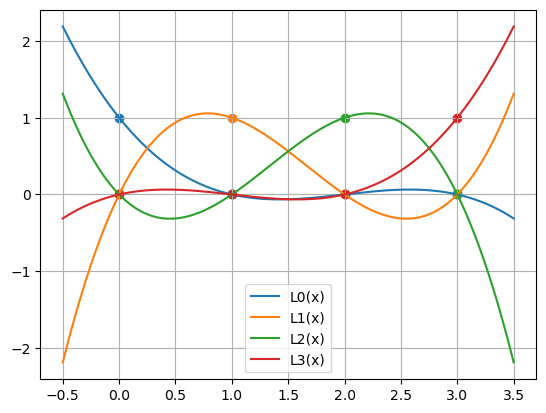

In [5]:
xd = np.linspace(-0.5, 3.5, 200)
xi = np.arange(0,4)

import matplotlib.pyplot as plt

for i in xi:
    yd = Li(xd, xi, i)
    plt.plot(xd, yd, label = f"L{i}(x)")
    plt.scatter(xi, Li(xi, xi, i))

plt.grid()
plt.legend()
plt.show()

Write a function
```
px = interpol0(x, xi, yi)
```
that computes
$$
p(x) = \sum_{i=0}^3 y_i\, \mathcal{L}_i(x)
$$
As an example, on the interval $[-0.5,3,5]$ plot the function that interpolates the points
$(x_i,y_i)$ where `xi = np.array([0,1,2,3]` and
`yi = np.array([1,-1,2,0])`.

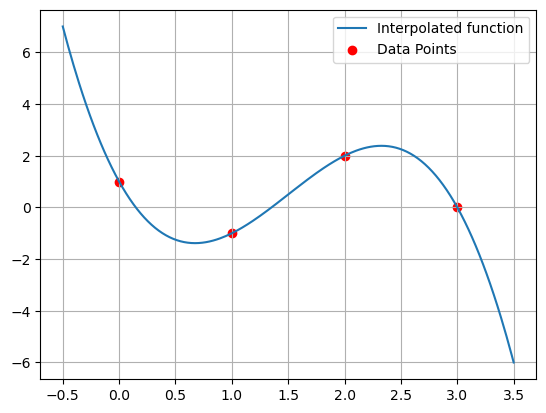

In [6]:
def interpol(x, xi, yi):
    px = 0
    for i in range(4):
        px += yi[i] * Li(x, xi, i)
    return px

xi = np.array([0.0,1,2,3])
yi = np.array([1.0,-1,2,0])
xd = np.linspace(-0.5, 3.5, 250)

yd = interpol(xd, xi, yi)
plt.plot(xd, yd, label = "Interpolated function")
plt.scatter(xi, yi, color = "red", label = "Data Points")
plt.grid()
plt.legend()
plt.show()

#### 1. Horner algorithm of optimal computation of polynomials
Write a python function
```
p = horner0(a, x)
```
that, from an array $a$ of coefficients $(a_0, a_1, ...,a_n)$, computes the polynomial $p(x)$:

$$
p(x) = a_0+ a_1 x + a_2 x^2 + ... + a_n x^n.
$$

Verification: apply the Horner algorithm to compute the polynomial $p(x) = -1+2x-x^2+x^3$ and check that you get the right values at points $x=0$, $x=1$ and $x=2$.

In [7]:
def horner0(a, x):
    #ao + x(a1 + x(a2 ...)
    n = a.size - 1
    p = a[n]

    for i in range(n-1, -1, -1):
        p = a[i] + x*p 
    return p

import numpy as np
xi = np.zeros(3)
a = np.array([-1, 2, -1, 1], dtype=np.float64)
x=0; px = horner0(a, x); print(px)
x=1; px = horner0(a, x); print(px)
x=2; px = horner0(a, x); print(px)
x=3; px = horner0(a, x); print(px)

-1.0
1.0
7.0
23.0


Then write a function
```
p = horner(a, xi, x)
```
that, from an array $a$ of coefficients $(a_0, a_1, ...,a_n)$ and an array $xi=(x_0,x_1,...,x_{n-1})$, computes the polynomial $p(x)$:

$$
p(x) = a_0 + a_1(x-x_0)+a_2(x-x_0)(x-x_1)+...+ a_n (x-x_0)(x-x_1)...(x-x_{n-1}).
$$

following the Horner algorithm procedure.

In [8]:
def horner(a, xi, x):
    # Pseudo code algorithm: 
    n = a.size - 1
    p = a[n]
    for i in range (n-1, -1, -1):
        p = a[i] + (x-xi[i])*p
    return p

Verification: apply the Horner algorithm to compute the polynomial $p(x) = -1+2x-x^2+x^3$ and check that you get the right values at points $x=0$, $x=1$ and $x=2$.

In [9]:
import numpy as np
xi = np.zeros(3)
a = np.array([-1, 2, -1, 1])
x=0; px = horner(a, xi, x); print(px)
x=1; px = horner(a, xi, x); print(px)
x=2; px = horner(a, xi, x); print(px)
x=3; px = horner(a, xi, x); print(px)

-1.0
1.0
7.0
23.0


#### Divided differences
Write a python function
```
d = diffdiv(y, xi)
```
that, from an array $xi=(x_0, x_1, .. x_{n})$ (where $x_i\neq x_j$ if $i\neq j$) and an array
$y=(y_0,...,y_n)$,
$y_0=f(x_0), \ y_1=f(x_1), ..., y_{n}=f(x_{n})$, 
computes the divided differences $f_0=f[x_0]$, $f_1=f[x_0,x_1]$, ..., $f_{n} = f[x_0, ..., x_n]$.

In [10]:
def diffdiv(y,xi):
    n = y.size - 1
    d = np.copy(y)
    for k in range(1 , n+1):
        for i in range (n, k-1, -1):
            d[i] = (d[i] - d[i-1])/(xi[i] - xi[i-k])
    return d

Numerical test: consider
$xi=(1,\ 3,\ 4.5,\ 5,\ 6)$ and $y=(1,\ 5,\ 3,\ 7,\ -1)$.

In [11]:
xi = np.array([1, 3, 4.5, 5, 6], dtype=np.float64) 
#!!  dtype=float64 important !)
y = np.array([1, 5, 3, 7, -1], dtype=np.float64)
d = diffdiv(y, xi)
print("d = ", d)

d =  [ 1.          2.         -0.95238095  1.4047619  -1.3031746 ]


#### Interpolation polynomial

Let $xi=(x_0, x_1, ..., x_n)$ be a set of interpolation points and $y=(y_0, y_1, ..., y_n)$ an array of values at interpolation points.
By using ```diffdiv()``` and ```horner()```, write a python function
```
p = interpol(y, x, xi)
```
that computes the interpolation polynomial $p(x)$ of degree less or equal to $n$, at point $x$, i.e. such that  $p(x_i)=y_i$ for $i=0,...,n$. 

Numerical test: consider $xi=(1, \ 3, \ 4.5, \ 5, \ 6)$, $y=(1, \ 5, \ 3, \ 7, \ -1)$. Compute $p(3)$ and $p(4)$. 

In [12]:
def interpol(y, xi, x):
    p = horner(diffdiv(y,xi), xi, x)
    return p

xi = np.array([1, 3, 4.5, 5, 6], dtype=np.float64)
y  = np.array([1, 5, 3, 7, -1], dtype=np.float64)
x = 3
print( interpol(y, xi, x) )
x = 4
print( interpol(y, xi, x) )

5.0
0.08095238095238155


#### Plotting the interpolation polynomial
By considering the array of discrete points $xd$
```
xd = np.linspace(1, 6, 200)
```
plot the interpolation polynomial $p$ for the data $xi$ and $y$ above. 
On the same graphics, display the interpolation points $(xi_i, y_i)$ with points in a different color (red for example).

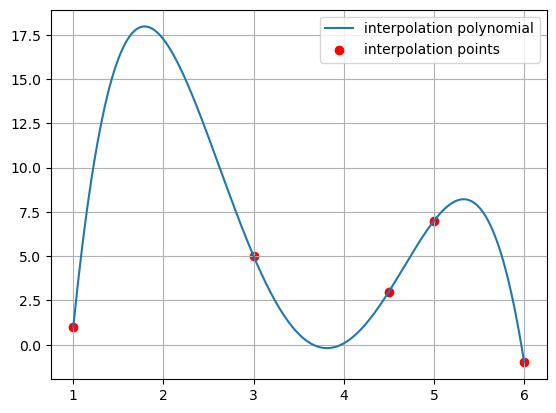

In [13]:
xd = np.linspace(1, 6, 200)
p = np.zeros(200)
p = interpol(y, xi, xd)

plt.plot(xd, p, label = "interpolation polynomial")
plt.scatter(xi, y, color = "red", label = "interpolation points")
plt.grid()
plt.legend()
plt.show()

#### Runge phenomenon
Consider now the function

$$
f(x) = \frac{1}{1+x^2}
$$

on the interval $[-5, 5]$. Consider the python arrays $xi$, $y$ et $xd$: 

```
N = # ... TO DEFINE
xi = np.linspace(-5, 5, N)
y = f(xi)
xd = np.linspace(-5, 5, 200)
```

Then compute and plot the interpolation polynomial $p$
for the different values of $N$  $N=5,\ 7,\ 10, 12, 24$ respectively. Is it satisfying ?

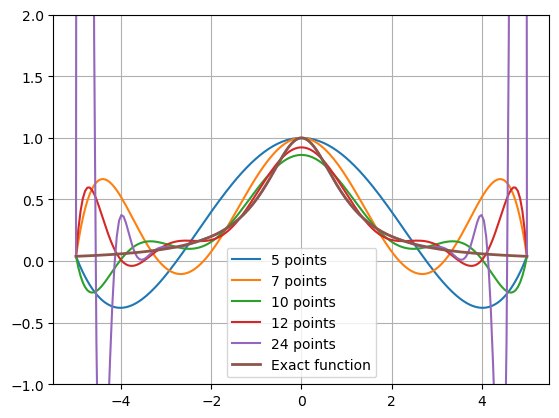

In [15]:
def f(x):
    y = 1.0 / (1.0 + x**2)
    return y

N = [5,7,10,12,24]
xd = np.linspace(-5,5,200)

for n in N:
    xi = np.linspace(-5,5, n)
    y = f(xi)
    p = interpol(y, xi, xd)
    plt.plot(xd, p, label = f"{n} points")
    #plt.scatter(xi, y)  #I have commented this just for a better view in the plot
    
plt.plot(xd, f(xd), linewidth=2, label="Exact function")
plt.ylim(-1,2); # I did this to zoom in more in order to see the overshot more clearly
plt.grid()
plt.legend()
plt.show()

#### Tchebychev points
Do the same thing, but now consider the Tchebychev interpolation points

```
tcheb = np.cos( np.linspace(np.pi/(2*N) , (2*N-1)*np.pi/(2*N), N) ) # dans [-1, 1]
xi = 5 * tcheb # be in [-5, 5]
y = f(xi)
xd = np.linspace(-5, 5, 200)
```

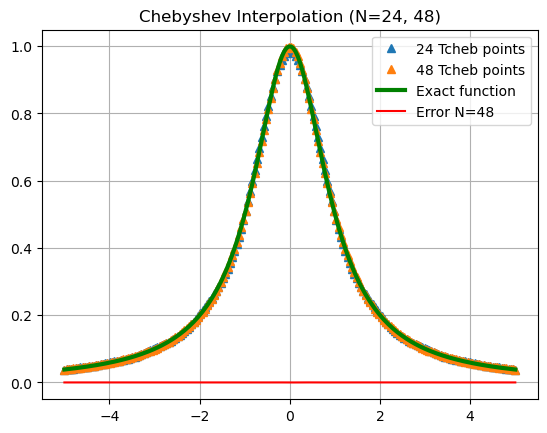

In [19]:
n = [24, 48]

xd = np.linspace(-5, 5, 200)

for N in n:
    tcheb = np.cos(np.linspace(np.pi/(2*N), (2*N-1)*np.pi/(2*N), N))
    xi = 5 * tcheb
    y = f(xi)
    p = interpol(y, xi, xd)
    plt.plot(xd, p, '^', linewidth = 0.5, label = f"{N} Tcheb points")
    #plt.scatter(xi, y)
    
plt.plot(xd, f(xd), '-g', linewidth = 3, label = "Exact function")

# In the plot we barely see the interpolation function for N = 48, so I also added the error:
error = p - f(xd)
plt.plot(xd, error, 'r', label=f"Error N={N}")

plt.grid()
plt.legend()
plt.title("Chebyshev Interpolation (N=24, 48)")
plt.show()